In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [163]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
sample  = pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')


In [164]:
train.dropna(inplace = True)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

ApplicantIncome


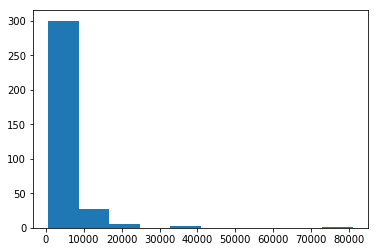

CoapplicantIncome


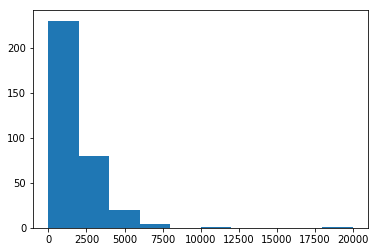

LoanAmount


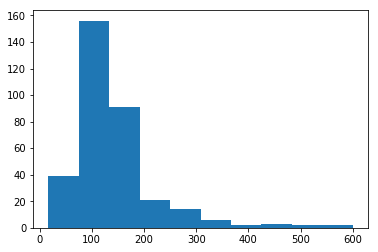

Loan_Amount_Term


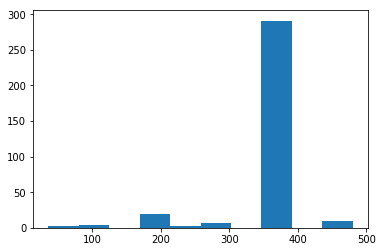

Credit_History


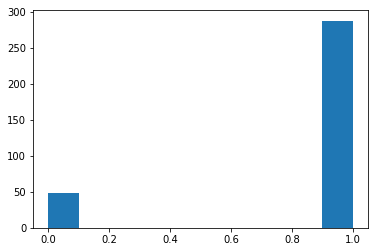

In [195]:

for col in cols:
    print(col)
    plt.hist(X_train[col])
    plt.show()
    

In [181]:
# Knn
min_max = MinMaxScaler()
Knn = KNeighborsClassifier(n_neighbors = 5)
Knn.fit(min_max.fit_transform( X_train[cols]), y_train)
y_pred =  Knn.predict(min_max.fit_transform(X_test[cols]))
accuracy_score(y_pred, y_test)

0.7222222222222222

In [182]:
for col in cols:
    test[col].fillna(test[col].mode()[0], inplace = True)

In [183]:
prediction = Knn.predict(test[cols])

In [184]:
sample

,Loan_ID,Loan_Status


In [185]:
test_df = test.copy()

test_df['Loan_Status'] = prediction

pre = test_df[['Loan_ID','Loan_Status']]

pre.to_csv('prediction.csv', index=False)

pre[pre.Loan_Status == 'Y'].count()